**GRIP: The Sparks Foundation**

**Data Science and Business Analytics Intern**

**Author: Seerat Ul Ain**

**Task 2**

**Problem Statement:**

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

**Importing the Required Libraries:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

**Loading Dataset:**

In [4]:
path = '/content/Iris.csv'
iris = pd.read_csv(path)
iris_df = pd.DataFrame(iris)
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Drop Useless Columns:**

In [5]:
del iris_df['Id']

**Displaying New Data Frame:**

In [6]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Plotting:**

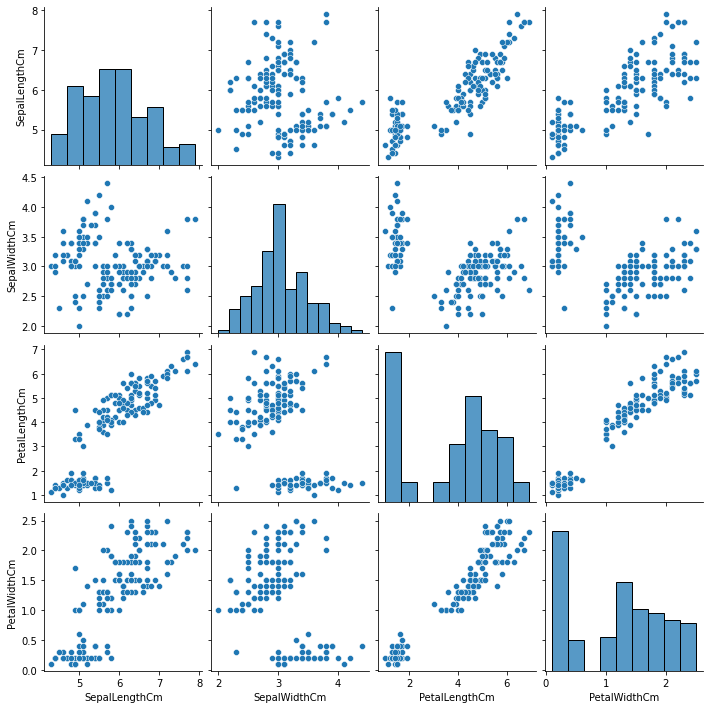

In [7]:
sns.pairplot(iris_df)

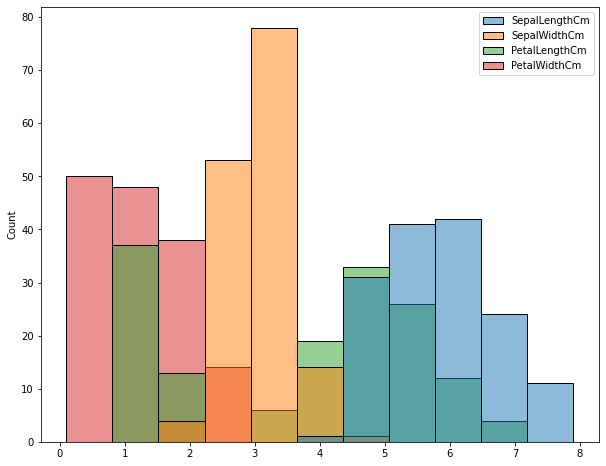

In [8]:
plt.figure(figsize=(10, 8))
sns.histplot(iris_df)

**Finding The Optimum Number of Clusters For K-Means Classification:**

In [9]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

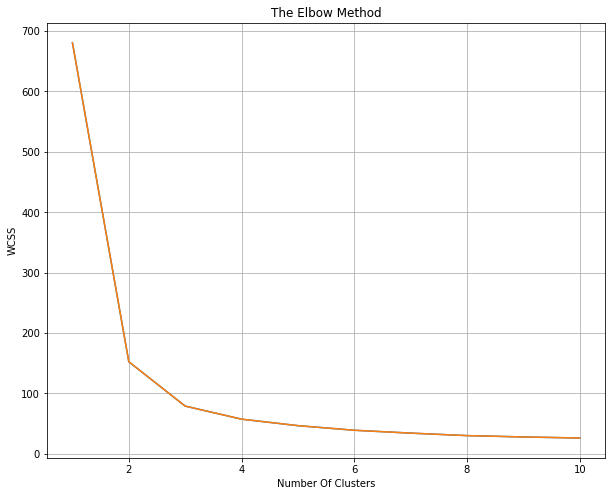

In [11]:
plt.figure(figsize=(10, 8))
# Plotting The Results On A Line Graph To Observe Elbow
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')

# Sum of Squares Within Clusters
plt.plot(range(1, 11), wcss)
plt.ylabel('WCSS') 
plt.grid()
plt.show()


The Elbow In The Above Plot Shows The Optimum Clusters.

**Applying K-Means Algorithm And Creating K-Means Classifier:**

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',  max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

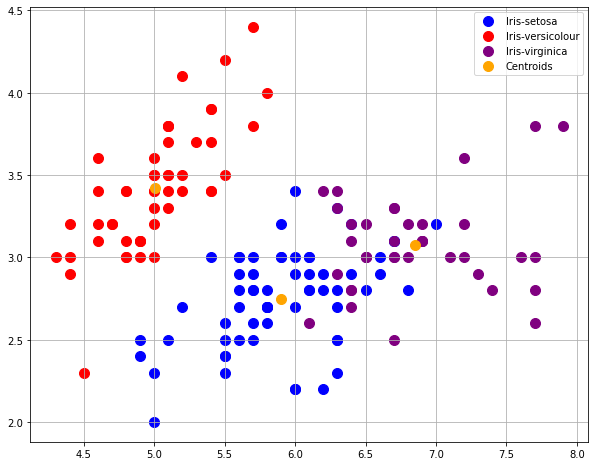

In [15]:
plt.figure(figsize=(10, 8))
# Visualising The Clusters (On The First Two Columns)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'purple', label = 'Iris-virginica')

# PLotting The Centeroids Of The Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'orange', label = 'Centroids')
plt.grid()
plt.legend()


We get the above Scatter Plot after applying K-Means Classificatin. The Three Orange Dots Are The Three Centroids And The Remaining Blue, Red and Purple Dots Represents The Classified Species of Flowers With Respect To Centeroids of Their Clusters.